# 1. Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.utils import save_model, load_model
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value, plot_residual
from jcopml.automl import AutoRegressor

# 2. Import Dataset

In [2]:
df = pd.read_csv('train_new.csv', index_col= 'Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,84,Good,8


In [3]:
X = df.drop(columns="SalePrice")
y = df.SalePrice

In [4]:
numeric = list(X.dtypes[X.dtypes != 'object'].index)
categoric = list(X.dtypes[X.dtypes == 'object'].index)

In [5]:
model = AutoRegressor(numeric, categoric)

In [6]:
model.fit(X, y, cv = 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
================== Best Model Info ==================
algo                      | XGBRegressor
algo__colsample_bytree    | 0.1349512609864809
algo__gamma               | 6
algo__learning_rate       | 0.11862189410697288
algo__max_depth           | 5
algo__n_estimators        | 196
algo__reg_alpha           | 2.0486889035689253
algo__reg_lambda          | 0.012194715233377654
algo__subsample           | 0.7826259151953849

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=False, strategy='mean')

=========== Score ===========
Train: 0.9978649290024911
Valid: 0.8681203809914996
Test : 0.8967313452551566


# Feature Importance

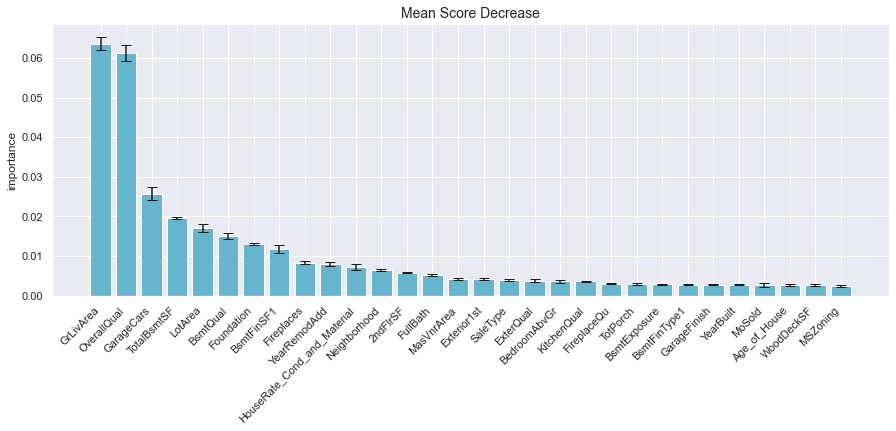

In [7]:
model.mean_score_decrease(plot=True, topk=30)

In [8]:
feature_imp = model.mean_score_decrease(plot=False, topk=30)

In [9]:
feature_impnew = list(feature_imp.feature[:30])

In [10]:
feature_impnew

['GrLivArea',
 'OverallQual',
 'GarageCars',
 'TotalBsmtSF',
 'LotArea',
 'BsmtQual',
 'Foundation',
 'BsmtFinSF1',
 'Fireplaces',
 'YearRemodAdd',
 'HouseRate_Cond_and_Material',
 'Neighborhood',
 '2ndFlrSF',
 'FullBath',
 'MasVnrArea',
 'Exterior1st',
 'SaleType',
 'ExterQual',
 'BedroomAbvGr',
 'KitchenQual',
 'FireplaceQu',
 'TotPorch',
 'BsmtExposure',
 'BsmtFinType1',
 'GarageFinish',
 'YearBuilt',
 'MoSold',
 'Age_of_House',
 'WoodDeckSF',
 'MSZoning']

In [11]:
numeric_imp = list(X[feature_impnew].select_dtypes(include = [np.number]))
categoric_imp = list(X[feature_impnew].select_dtypes(include = [np.object]))

In [12]:
model = AutoRegressor(num_feature= numeric_imp, cat_feature= categoric_imp)

In [13]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,84,Good,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,40,Above Average,8
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,0,Above Average,32
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,60,Very Good,69


In [14]:
model.fit(X, y, cv=5, algo=['xgb'], n_trial=100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
================== Best Model Info ==================
algo                      | XGBRegressor
algo__colsample_bytree    | 0.8225681037382104
algo__gamma               | 5
algo__learning_rate       | 0.16122896403303857
algo__max_depth           | 3
algo__n_estimators        | 162
algo__reg_alpha           | 0.04550072710959481
algo__reg_lambda          | 2.844936403185073
algo__subsample           | 0.7614801158992426

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=True, strategy='mean')
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.9811426229223545
Valid: 0.8659779076155116
Test : 0.8952477875531268
